### XGBoost Regression
XGBoost 是許多資料科學競賽中常出現的常勝軍。也是當今熱門的ML演算法

1. 使用許多策略去防止過擬合
2. early stop 機制可以提早結束訓練
3. 可手動設置樣本權重以及學習速率

### Boosting vs Decision tree
1. 決策樹通常為一顆複雜的樹
2. Boosting 是產生非常多棵的樹但是每一棵的樹都很簡單

目標把多個簡單的樹合再一起才能當最後的預測

### Bagging vs Boosting
一般來說Boosting的模型會比Bagging來的精準

1. Bagging 透過抽樣的方式生成樹，每棵樹彼此獨立
2. Boosting 透過序列的方式生成樹，後面生成的樹會與前一棵樹相關

### Example 1 (簡單線性回歸)
簡單線性回歸舉例， $$ y=ax+b $$ ，a稱為斜率 ， b稱為截距

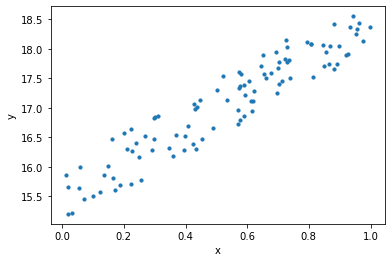

In [1]:
#import 
import numpy as np
import matplotlib.pyplot as plt

#產生亂數資料
np.random.seed(0)
noise = np.random.rand(100,1)  #0~1之間 隨機取100個
x = np.random.rand(100,1)
y = 3 * x + 15 +noise          # y=ax+b Target function a=3,b=15 


#plot
plt.scatter(x,y,s=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

### XGBoost(回歸器)
Boosting 則是希望能夠由後面生成的樹，來修正前面樹，學得不好的地方

Paremeter:
1. n_estimators : 總共迭代的次數，即決策樹的個數，預設值為100
2. max_depth : 樹的最大深度，默認值為6
3. booster : gbtree 樹模型(預設) / gblinear 線性模型
4. learning_rate : 學習速率 ， 預設0.3
5. gamma : 懲罰項係數，指定節點分裂所需的最小損失函數下降值

Attributes :
1. feature_importances_ : 查詢模型特徵的重要程度

Methods :
1. fit : 放入X、y進行模型擬合
2. predict : 預測並回傳預測類別
3. score : 預測成功的比例
4. predict_proba : 預測每個類別的機率值

In [4]:
import xgboost as xgb
#建立xgbrModel模型
xgbrModel = xgb.XGBRFRegressor()

#使用訓練資料訓練模型
xgbrModel.fit(x,y)

#使用訓練資料預測
predicted = xgbrModel.predict(x)

In [5]:
print("Score" , xgbrModel.score(x,y))

Score 0.9763621876981902


### 模型評估
scikit-learn 決策樹回歸模型的score函式是R2 score，可作為模型評估依據，其數值越接近於1代表模型越佳。除了R2 score還有其他許多迴歸模型的評估方法，例如 : MSE 、 MAE 、 RMSE 。

In [7]:
from sklearn import metrics
print("R2 score" , xgbrModel.score(x,y))

mse = metrics.mean_squared_error(y,predicted)

print("MSE score: ",mse)


R2 score 0.9763621876981902
MSE score:  0.017505835736811932


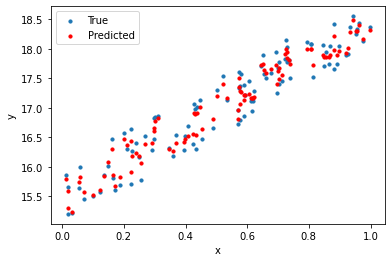

In [8]:
#plot
plt.scatter(x,y,s=10,label="True")
plt.scatter(x,predicted,color="r",s=10,label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()